# Predicted Orbit Files

Predicted Orbit Files are generated from FOS for the three Swarm spacecrafts.

They are available on Swarm FTP at `/Auxiliary/Sat_x/MPLxORBPRE` for `mission` users.

## Parse predicted orbit file from ZIP archive

In [1]:
from pathlib import Path
from xml.etree import ElementTree
from zipfile import ZipFile

import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
file = Path('SW_OPER_MPLAORBPRE_20161230T000000_20170203T000000_1140.ZIP').resolve()

with ZipFile(file) as zf:
    et = ElementTree.parse(zf.open(file.with_suffix('.EEF').name))

# parse orbit state vectors
ns = {'': 'http://eop-cfi.esa.int/CFI'}
osvs = [
    {
        'TAI': pd.Timestamp(osv.findtext('TAI', namespaces=ns)[4:]),
        'UTC': pd.Timestamp(osv.findtext('UTC', namespaces=ns)[4:]),
        'UT1': pd.Timestamp(osv.findtext('UT1', namespaces=ns)[4:]),
        'Absolute_Orbit': int(osv.findtext('Absolute_Orbit', namespaces=ns)),
        'X': float(osv.findtext('X', namespaces=ns)),
        'Y': float(osv.findtext('Y', namespaces=ns)),
        'Z': float(osv.findtext('Z', namespaces=ns)),
        'VX': float(osv.findtext('VX', namespaces=ns)),
        'VY': float(osv.findtext('VY', namespaces=ns)),
        'VZ': float(osv.findtext('VZ', namespaces=ns))
    }
    for osv in et.iterfind('./Data_Block/List_of_OSVs/OSV', ns)
]

osvs_df = pd.DataFrame(osvs)
osvs_df.head()

,TAI,UTC,UT1,Absolute_Orbit,X,Y,Z,VX,VY,VZ
0,2016-12-30 00:58:31.303520,2016-12-30 00:57:55.303520,2016-12-30 00:57:54.897105,17409,-3271925.297,5986996.999,-6646.765,127.687752,66.931231,7637.096168
1,2016-12-30 02:31:59.698877,2016-12-30 02:31:23.698877,2016-12-30 02:31:23.292408,17410,-618272.533,6794541.911,-6650.834,143.530112,10.547535,7637.139734
2,2016-12-30 04:05:28.153986,2016-12-30 04:04:52.153986,2016-12-30 04:04:51.747469,17411,2137461.661,6478975.739,-6656.291,135.801250,-47.410836,7637.272177
3,2016-12-30 05:38:56.596916,2016-12-30 05:38:20.596916,2016-12-30 05:38:20.190356,17412,4539691.490,5092681.606,-6662.827,105.769600,-97.584685,7637.451614
4,2016-12-30 07:12:24.980484,2016-12-30 07:11:48.980484,2016-12-30 07:11:48.573879,17413,6191618.178,2864919.385,-6670.139,58.287888,-131.853348,7637.504389


In [3]:
anxs = osvs_df[['UTC', 'Absolute_Orbit']].set_index('UTC')['Absolute_Orbit']
anxs.index.name = None
anxs

2016-12-30 00:57:55.303520    17409
2016-12-30 02:31:23.698877    17410
2016-12-30 04:04:52.153986    17411
2016-12-30 05:38:20.596916    17412
2016-12-30 07:11:48.980484    17413
                              ...  
2017-02-02 16:50:34.152478    17943
2017-02-02 18:24:02.007849    17944
2017-02-02 19:57:29.850120    17945
2017-02-02 21:30:57.769933    17946
2017-02-02 23:04:25.700457    17947
Name: Absolute_Orbit, Length: 539, dtype: int64

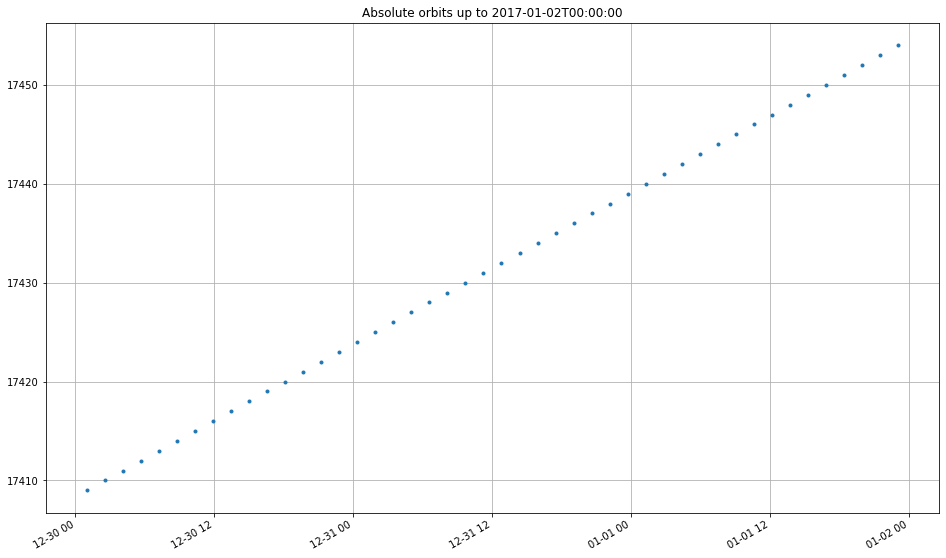

In [4]:
end = '2017-01-02T00:00:00'
anxs.loc[:end].plot(figsize=(16, 10), style='.', grid=True, title=f"Absolute orbits up to {end}")
pyplot.show()

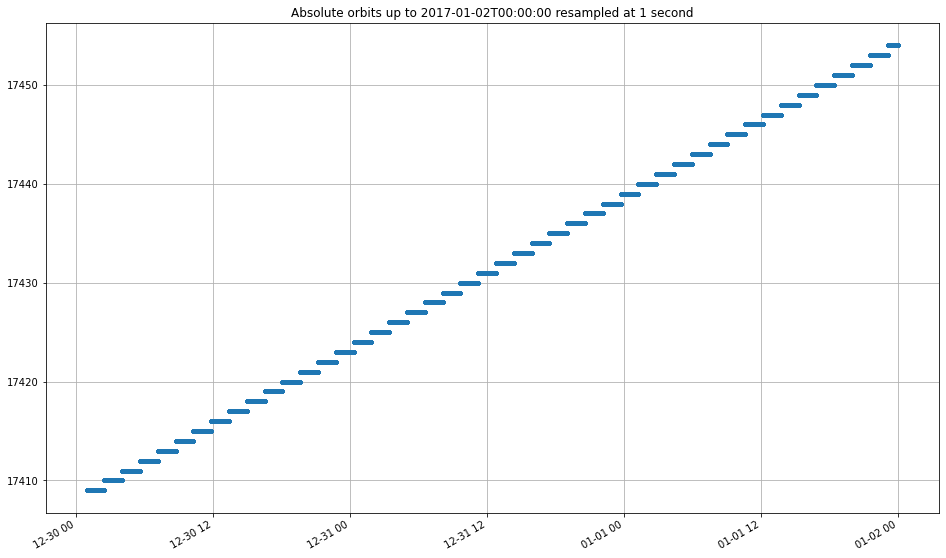

In [5]:
end = '2017-01-02T00:00:00'
anxs.asfreq('S', method='pad').loc[:end].plot(
    figsize=(16, 10), style='.', grid=True,
    title=f"Absolute orbits up to {end} resampled at 1 second"
)
pyplot.show()

In [6]:
(osvs_df['TAI'] - osvs_df['UTC']).dt.total_seconds()

0      36.0
1      36.0
2      36.0
3      36.0
4      36.0
       ... 
534    37.0
535    37.0
536    37.0
537    37.0
538    37.0
Length: 539, dtype: float64

In [7]:
deltas = osvs_df[['UTC', 'Absolute_Orbit']].copy()
deltas.insert(1, 'TAI-UTC', (osvs_df['TAI'] - osvs_df['UTC']).dt.total_seconds())
deltas.set_index('UTC', inplace=True)
deltas

,TAI-UTC,Absolute_Orbit
UTC,,
2016-12-30 00:57:55.303520,36.0,17409
2016-12-30 02:31:23.698877,36.0,17410
2016-12-30 04:04:52.153986,36.0,17411
2016-12-30 05:38:20.596916,36.0,17412
2016-12-30 07:11:48.980484,36.0,17413
...,...,...
2017-02-02 16:50:34.152478,37.0,17943
2017-02-02 18:24:02.007849,37.0,17944
2017-02-02 19:57:29.850120,37.0,17945


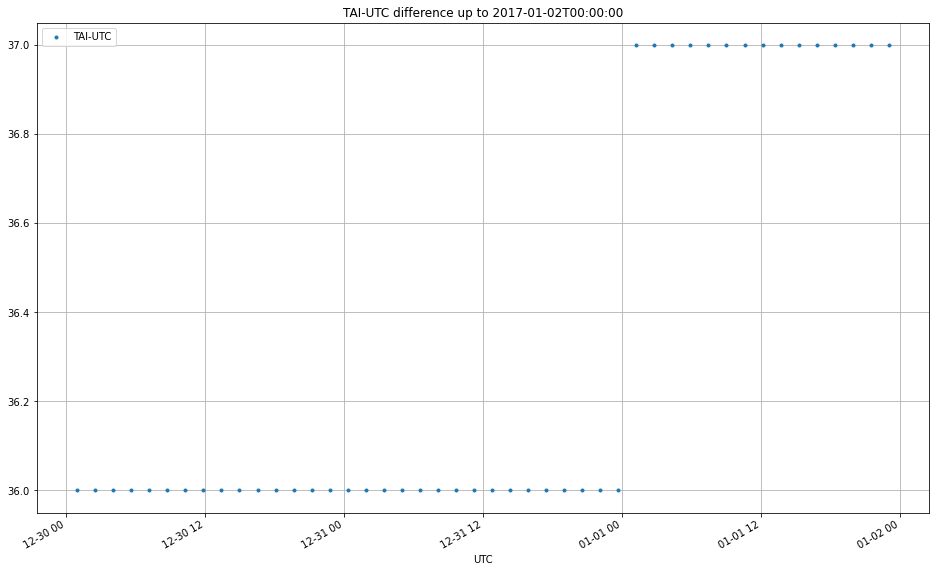

In [8]:
end = '2017-01-02T00:00:00'
deltas[:end].plot(y='TAI-UTC', figsize=(16, 10), style='.', grid=True, title=f"TAI-UTC difference up to {end}")
pyplot.show()